In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings

In [2]:
data = pd.read_csv('spotify_songs.csv')
data.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,mood
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,Happy
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,Happy
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,Happy
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,Happy
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,Sad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
data.shape

(32833, 24)

In [5]:
data.describe().transform

<bound method DataFrame.transform of        track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171

In [6]:
# remove all character insted of alphabet
# remove special characters and emojis
pat = r'[^\w\s]'
data = data.replace(pat, '', regex=True)


<Axes: title={'center': 'Unique values'}>

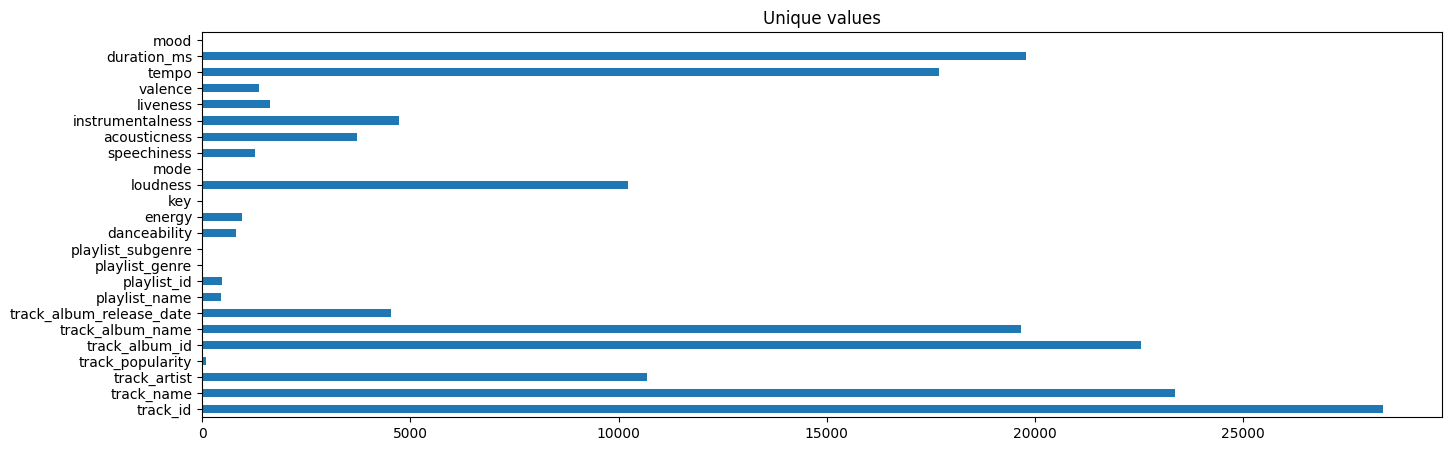

In [7]:
# Total unique values
unique_value = data.nunique()
unique_value.plot(kind='barh', figsize=(16, 5), title='Unique values')

In [8]:
# Duplicate values
duplicate_value = data.duplicated(keep='last').sum()
print("Total duplicate values in dataset: ", duplicate_value)

Total duplicate values in dataset:  0


<Axes: xlabel='track_artist'>

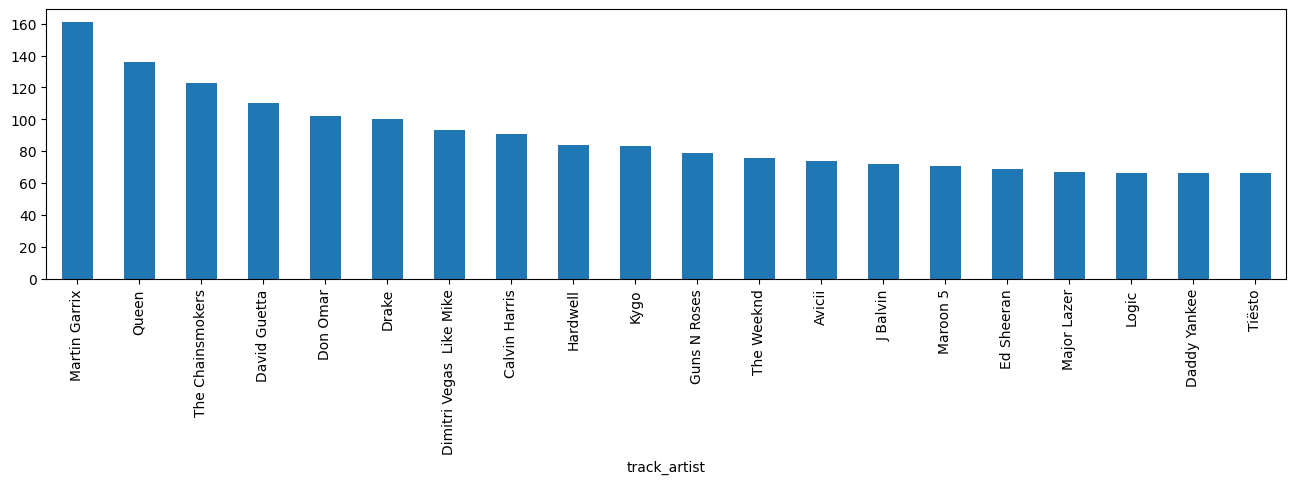

In [9]:
artist_count = data['track_artist'].value_counts()
artist_count.head(20).plot(kind='bar', figsize=(16,3.5))

Here, it is a list of top 20 artist according to frequency of artist in dataset

<Axes: ylabel='count'>

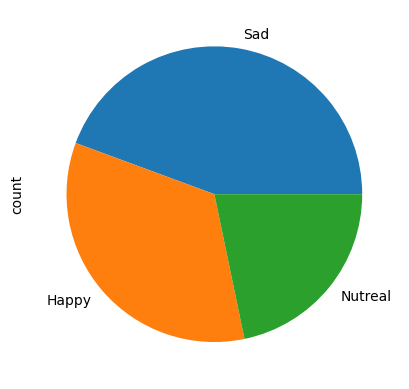

In [10]:
# Analysed the pridicted variable
predicted_var = data['mood'].value_counts()
predicted_var.plot(kind='pie')

In [11]:
data = data.drop(columns=['track_album_id', 'playlist_id', 'key'])

In [12]:
column = data.columns

In [13]:
# Get column name which has binary data: Binary column values
binary_columns = [col for col in data 
             if np.isin(data[col].dropna().unique(), [0, 1]).all()]
print(len(binary_columns))
print(binary_columns)

1
['mode']


In [14]:
# Get column name which has object data: Object column values
object_column = data.select_dtypes(include=['object']).columns
print(len(object_column))
print(object_column)

9
Index(['track_id', 'track_name', 'track_artist', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'mood'],
      dtype='object')


In [15]:
# Get column name which has countinues data: countinues column values
# In previous model, facing problem with countinues value so I handle it in following ways.
non_continues_column =[]
for i in range(0, len(binary_columns)):
    non_continues_column.append(binary_columns[i])

for i in range(0, len(object_column)):
    non_continues_column.append(object_column[i])
    
continues_column = [x for x in column if x not in non_continues_column]
continues_column.pop(0)
print("continues data: ",continues_column)

continues data:  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [16]:
# # Handle continues value
# # Train data
# for i in range(0, len(continues_column)):
#     data[continues_column[i]] = np.log1p(data[continues_column[i]])

In [17]:
# Handle null value
data_missing_column = data.isnull().sum()

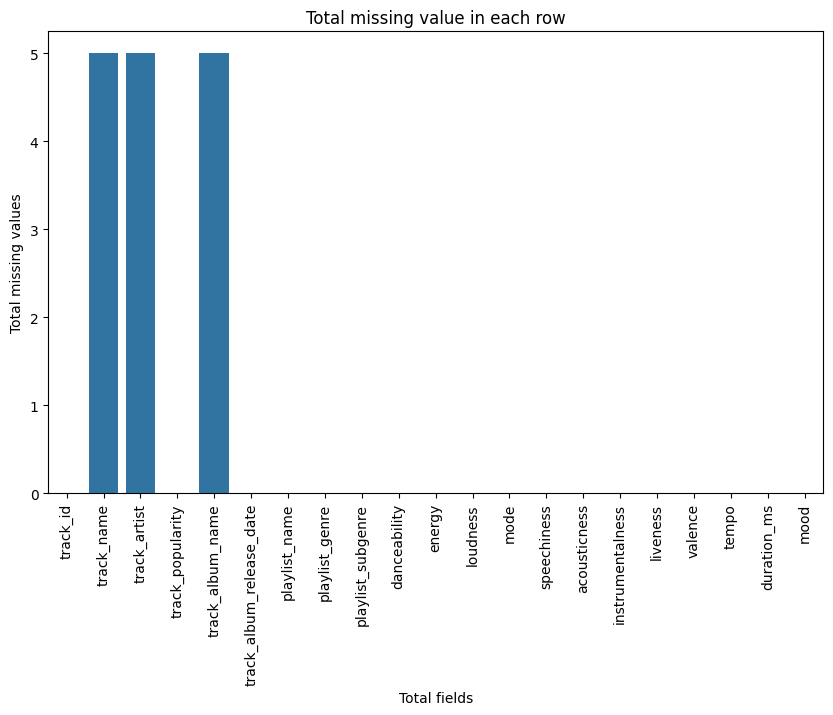

In [18]:
# Verify missing values using bar graphs
plt.figure(figsize=(10, 6))
sns.barplot(x = data_missing_column.index, y=data_missing_column.values)
plt.xticks(rotation=90)
plt.xlabel('Total fields')
plt.ylabel('Total missing values')
plt.title('Total missing value in each row')
plt.show()

In [19]:
data = data.dropna()

In [20]:
# label encoding
from sklearn import preprocessing
label_data = preprocessing.LabelEncoder()

for col in object_column:
    data[col] = label_data.fit_transform(data[col])

data

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,mood
0,24146,8836,2769,66,7551,4295,295,2,3,0.748,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,0
1,3061,12447,6076,67,10338,4472,295,2,3,0.726,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,0
2,7219,870,10411,70,930,4315,295,2,3,0.675,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,0
3,25695,2960,9208,60,2743,4328,295,2,3,0.718,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,0
4,5987,17835,5392,69,14775,4200,295,2,3,0.650,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,26852,3507,5715,42,3185,2810,1,0,18,0.428,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2
32829,18773,3580,9095,20,3260,2560,1,0,18,0.522,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2
32830,26461,18770,8740,14,15511,2805,1,0,18,0.529,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2
32831,10083,14365,6132,15,11895,2740,1,0,18,0.626,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2


In [21]:
X = data.drop(columns=['mood', 'track_id'])
y = data['mood']

In [22]:
# SPlit the ddata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape[1])
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



19
(6565,)
(26263, 19)
(26263,)


In [23]:
# SVM model function
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def svm_model(X_train, X_test, y_train, y_test):
    svm_model = svm.SVC(kernel='poly', degree=3, C=1 )
    svm_model.fit(X_train, y_train) 
    y_pred = svm_model.predict(X_test)   
    accuracy  = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return(
        {
            "SVM accuracy": accuracy,
            "SVm f1-score": f1
        }
    )

svm_model(X_train, X_test, y_train, y_test)

{'SVM accuracy': 0.443209077409283, 'SVm f1-score': 0.27221875107743737}

In [24]:
# DNN model function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras import layers, regularizers

def dnn_model(X_train, X_test, y_train, y_test):
    model = Sequential()

    model.add(
        Dense(
            64, 
            activation='relu', 
            input_shape= (X_train.shape[1], )
        )
    )

    model.add(
        Dropout(0.2)
    )

    model.add(
        Dense(
            32,
            activation = 'relu',
            input_shape = (X_train.shape[1],)
        )
    )

    model.add(
        Dropout(0.2)
    )
    model.add(
        Dense(
            16,
            activation = 'relu',
            input_shape = (X_train.shape[1],)
        )
    )
    
    model.add(
        Dropout(0.2)
    )

    model.add(
        Dense(
            1,
            activation = 'sigmoid'
        )
    )

    # compile model
    model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Fit training and test data into model
    model.fit(
        X_train,
        y_train,
        batch_size = 32,
        epochs = 5,
        validation_split = 0.1
    )
dnn_model(X_train, X_test, y_train, y_test)

Epoch 1/5


c:\Program Files\Python\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Program Files\Python\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2519 - loss: 0.0000e+00 - val_accuracy: 0.2237 - val_loss: 0.0000e+00
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.2150 - loss: 0.0000e+00 - val_accuracy: 0.2237 - val_loss: 0.0000e+00
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.2060 - loss: 0.0000e+00 - val_accuracy: 0.2237 - val_loss: 0.0000e+00
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2071 - loss: 0.0000e+00 - val_accuracy: 0.2237 - val_loss: 0.0000e+00
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.2105 - loss: 0.0000e+00 - val_accuracy: 0.2237 - val_loss: 0.0000e+00
